# Preparation

Preparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `SC_HW1_bank_data.csv` sebelum tahap pemodelan :
1. Import Library
2. Input Dataset
3. Preprocessing
4. Train-Test Split

## Import Library

In [ ]:
import pandas as pd
import numpy as np

## Input Dataset

In [ ]:
#Membaca data dan memasukkannya ke dalam bentuk Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/SC_HW1_bank_data.csv')

In [ ]:
#Jalankan code untuk mengecek nama kolom yang tersedia
df.columns

Index(['RowNumber', 'CustomerId', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.head()

,RowNumber,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Hilangkan kolom yang dirasa tidak relevan dengan model (contoh: ID). None dapat diisi dengan nama-nama kolom yang akan digunakan.
#Contoh df = df[['X1','X2', 'Y']].copy()

#START CODE
df = df[['Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

In [ ]:
df.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,42,2,0.00,1,1,1,1
1,Spain,Female,41,1,83807.86,1,0,1,0
2,France,Female,42,8,159660.80,3,1,0,1
3,France,Female,39,1,0.00,2,0,0,0
4,Spain,Female,43,2,125510.82,1,1,1,0


## Preprocessing

In [ ]:
#Lakukan One-Hot Encoder untuk data categorical, dengan fungsi pandas get_dummies

#START CODE
df = pd.get_dummies(df, columns=['Geography','Gender'])

In [ ]:
#Pisahkan mana X (feature) dengan Y,
#Y adalah kolom "Exited"

#START CODE
X = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
#Lakukan Scaler dan/atau Noermalisasi jika diperlukan
from sklearn.preprocessing import MinMaxScaler

#START CODE
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)

In [ ]:
#Ini digunakan jika dilakukan scaler/Normalisas. Jika tidak, code ini bisa dilewat dan diganti dengan code yang ada di dalam komen
X_transform = pd.DataFrame(X_transform, columns = X.columns)
#X_transform = X.copy()

## Train-Test Split

In [ ]:
#Split menjadi train dan test dengan test_size 25%
#Tidak perlu mengubah code ini

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 0.25,random_state = 123)

# Modeling

## Model1

### Soal :
Jelaskan secara Singkat Model pertama yang digunakan!

Random Forest Classifier:

Jenis Model: Model ensemble yang terdiri dari beberapa pohon keputusan.
Penggunaan Umum: Digunakan untuk klasifikasi dan regresi.
Kelebihan: Mampu menangani data yang besar, fitur-fitur yang banyak, dan mengatasi overfitting. Dapat memberikan pentingnya fitur.
Parameter Utama: Jumlah pohon (n_estimators), kedalaman maksimum pohon (max_depth), dan parameter lain yang mengendalikan pertumbuhan pohon.

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest Classifier
model1 = RandomForestClassifier()

# Definisikan parameter yang ingin diuji
params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator= model1,
             param_grid= params,
             scoring = 'accuracy',
             n_jobs = 16, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(X_train,y_train)
best_params = grid.best_params_
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [ ]:
#lakukan evaluasi dengan beberapa maetric di bawah ini
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1983
           1       0.81      0.46      0.58       517

    accuracy                           0.87      2500
   macro avg       0.84      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500


[[1928   55]
 [ 281  236]]

0.8656


## Model2
### Soal :
Jelaskan secara Singkat Model ke-2 yang digunakan!

Support Vector Machine (SVM) Classifier:

Jenis Model: Model yang digunakan untuk masalah klasifikasi dan regresi, dengan kemampuan baik dalam menangani data linier dan non-linier.
Penggunaan Umum: Digunakan untuk klasifikasi biner dan multi-kelas.
Kelebihan: Efektif dalam mengatasi data yang tidak linier dan memiliki fleksibilitas dalam pemilihan kernel (misalnya, linear, polynomial, rbf).
Parameter Utama: Parameter regularisasi (C), jenis kernel (kernel), dan parameter kernel (seperti gamma).

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.svm import SVC

# Inisialisasi model SVM Classifier
model2 = SVC()

# Definisikan parameter yang ingin diuji
params = {
    "C": [0.1, 1, 10],  # Parameter regularisasi
    "kernel": ["linear", "poly", "rbf"],  # Jenis kernel
    "gamma": ["scale", "auto"]  # Koefisien kernel (untuk kernel non-linear)
}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator= model2,
             param_grid= params,
             scoring = 'accuracy',
             n_jobs = 16, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(X_train,y_train)
best_params = grid.best_params_
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1983
           1       0.85      0.40      0.54       517

    accuracy                           0.86      2500
   macro avg       0.86      0.69      0.73      2500
weighted avg       0.86      0.86      0.84      2500


[[1948   35]
 [ 312  205]]

0.8612


## Model3
### Soal :
Jelaskan secara Singkat Model ke-3 yang digunakan!

XGBoost (Extreme Gradient Boosting) adalah sebuah algoritma machine learning yang termasuk dalam kategori ensemble learning, khususnya ensemble boosting. Berikut adalah penjelasan singkat tentang model XGBoost:

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
import xgboost as xgb

# Inisialisasi model XGBoost
model3 = xgb.XGBClassifier()

# Definisikan parameter yang ingin diuji
params = {'learning_rate': [0.01, 0.1],
          'max_depth': [3, 5, 7],
          'n_estimators': [100, 500, 800]}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator= model3,
             param_grid= params,
             scoring = 'accuracy',
             n_jobs = 16, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(X_train,y_train)
best_params = grid.best_params_
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1983
           1       0.79      0.48      0.60       517

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.86      0.87      0.85      2500


[[1916   67]
 [ 267  250]]

0.8664


## Tarik Kesimpulan Model Mana yang terbaik beserta alasannya

Random Forest = 0.8656 SVM = 0.8612 Xgboost = 0.8664

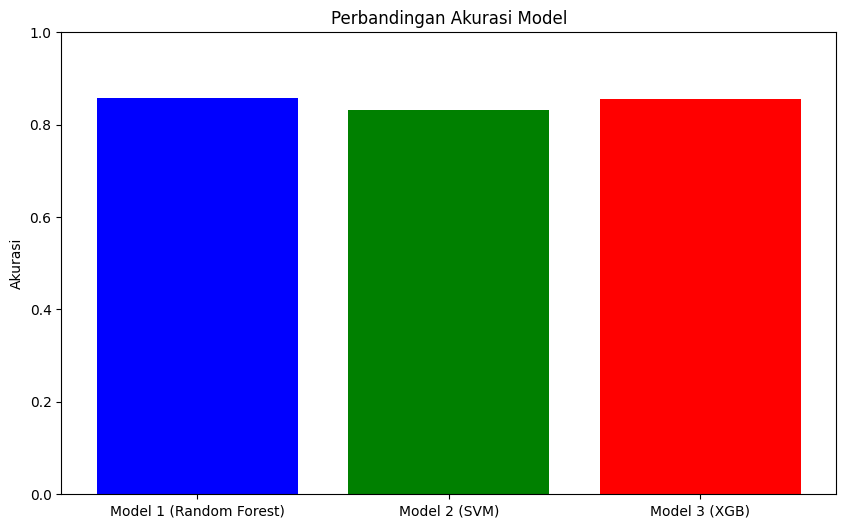

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Menginisialisasi dan melatih ketiga model (model1, model2, model3)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Membuat prediksi pada set pengujian
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

# Menghitung akurasi dari masing-masing model
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)

# Menyimpan akurasi dalam sebuah list
accuracies = [accuracy1, accuracy2, accuracy3]

# Label untuk model
model_labels = ['Model 1 (Random Forest)', 'Model 2 (SVM)', 'Model 3 (XGB)']

# Membuat plot perbandingan akurasi
plt.figure(figsize=(10, 6))
plt.bar(model_labels, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.ylim([0, 1])  # Mengatur skala sumbu y antara 0 dan 1
plt.show()
